<a href="https://colab.research.google.com/github/Chaqmoqjon/Vizualizatsiya/blob/main/3_sns_barplot_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/uzbekistan.csv', index_col=0)
df.columns = ['maydon', 'aholi']
df.head()

,maydon,aholi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0


<ipython-input-11-372997ecce8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.index, y = df.aholi, palette='viridis')


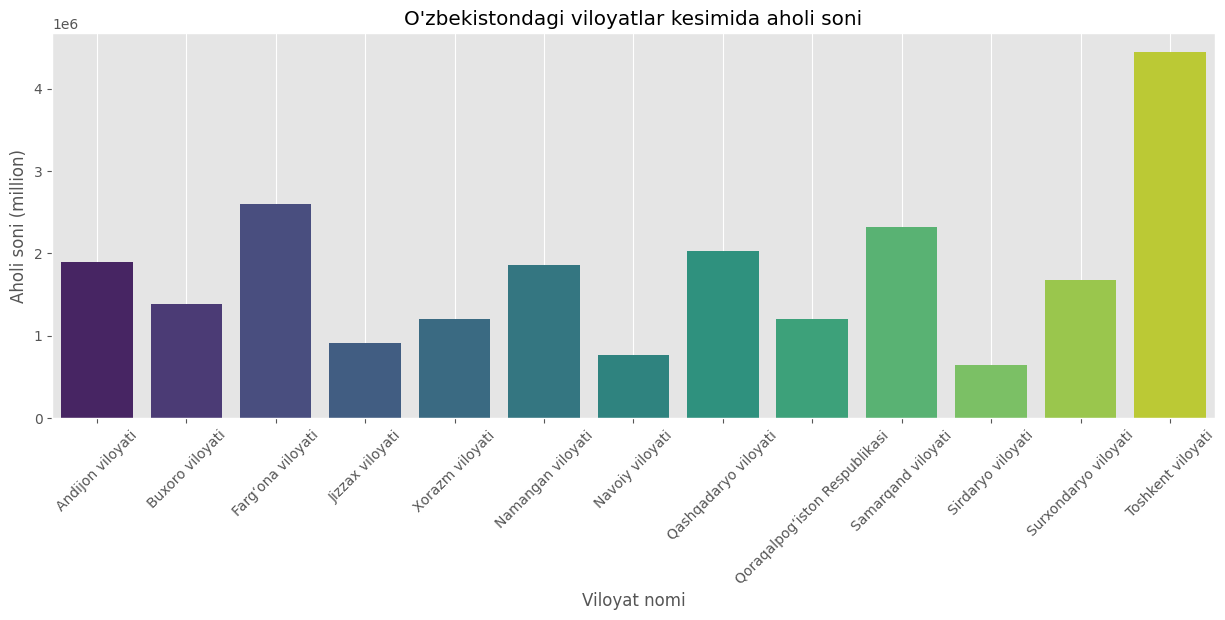

In [ ]:

plt.figure(figsize=(15, 5)) #plt va sns birlashmasi
sns.barplot(x = df.index, y = df.aholi, palette='viridis')
plt.title("O'zbekistondagi viloyatlar kesimida aholi soni")
plt.xlabel("Viloyat nomi")
plt.ylabel("Aholi soni (million)")
plt.grid()
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-9d6081df850c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.index, y = df.maydon, palette='viridis')


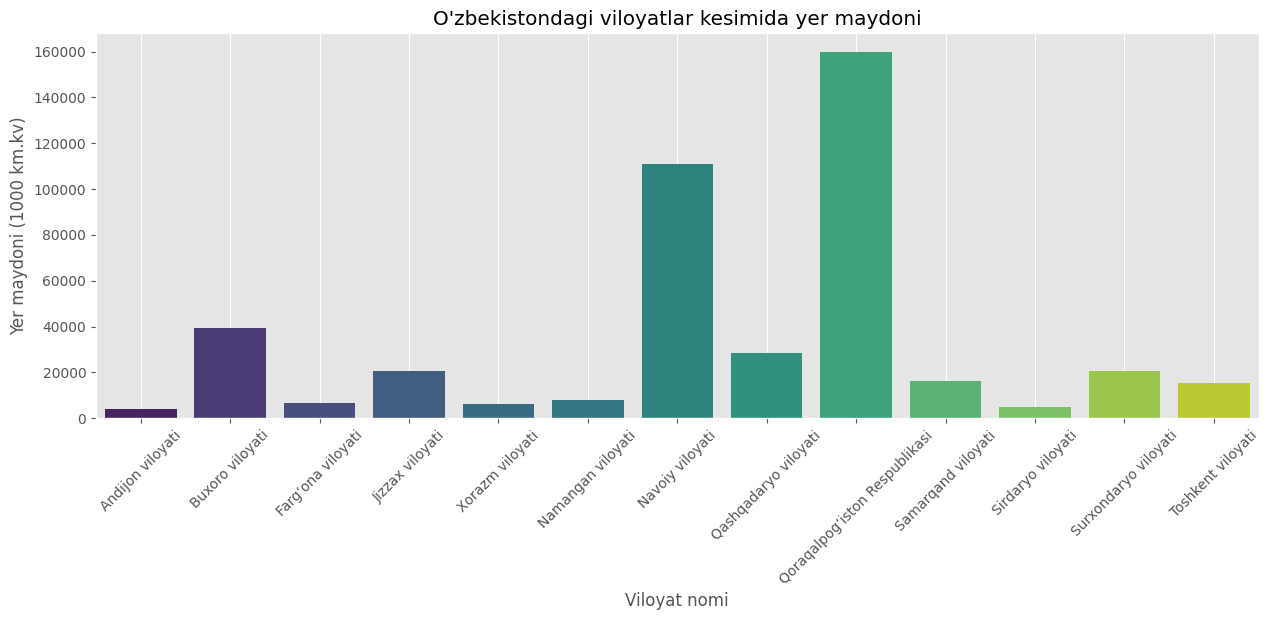

In [ ]:
plt.figure(figsize=(15, 5)) #plt va sns birlashmasi
sns.barplot(x = df.index, y = df.maydon, palette='viridis')
plt.title("O'zbekistondagi viloyatlar kesimida yer maydoni")
plt.xlabel("Viloyat nomi")
plt.ylabel("Yer maydoni (1000 km.kv)")
plt.grid()
plt.xticks(rotation=45)
plt.show()

##HEATMAP

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/museum_visitors.csv', index_col = 0,  parse_dates=[0], usecols = [0, 1]) #parse_dates indeksni date turida saqlab indeksga aylantirdi
df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [ ]:
df2 = df.groupby(['month', 'year']).max()
df2.head()

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265

In [ ]:
df2.unstack(level = 0 ).head()

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

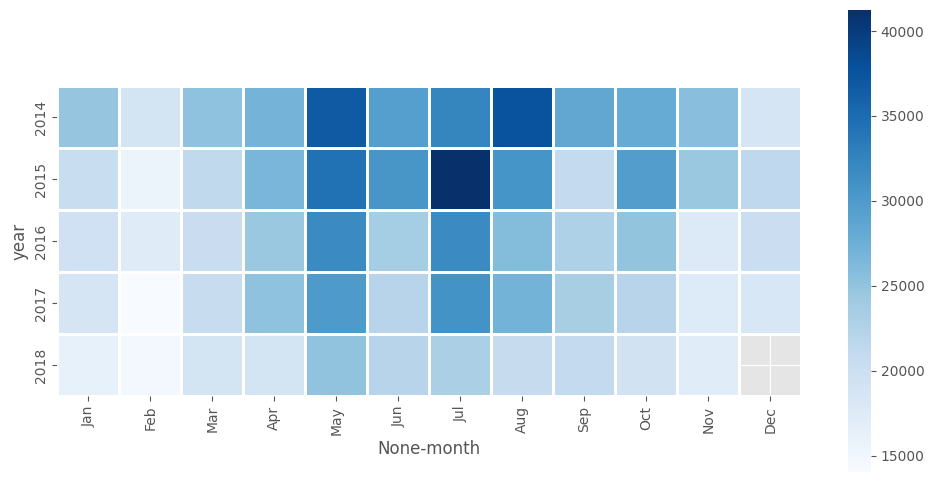

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df2.unstack(level = 0), cmap = 'Blues', linewidths=1, square=True) #yuqoridagi jadvalni heatmapda tasviri
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, xticks_labels)
plt.show()